In [1]:
library(lmtest)
library(car)
library(carData)
library(ggplot2)
library(zoo)
library(sandwich)
library(dynlm)
library(tseries)
library(forecast)
library(tseries)
library(urca)

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"
Warning message:
"package 'ggplot2' was built under R version 4.2.2"
Warning message:
"package 'sandwich' was built under R version 4.2.2"
Warning message:
"package 'dynlm' was built under R version 4.2.2"
Warning message:
"package 'tseries' was built under R version 4.2.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'forecast' was built under R version 4.2.2"
Warning message:
"package 'urca' was built under R version 4.2.2"


### TAO Random Walk

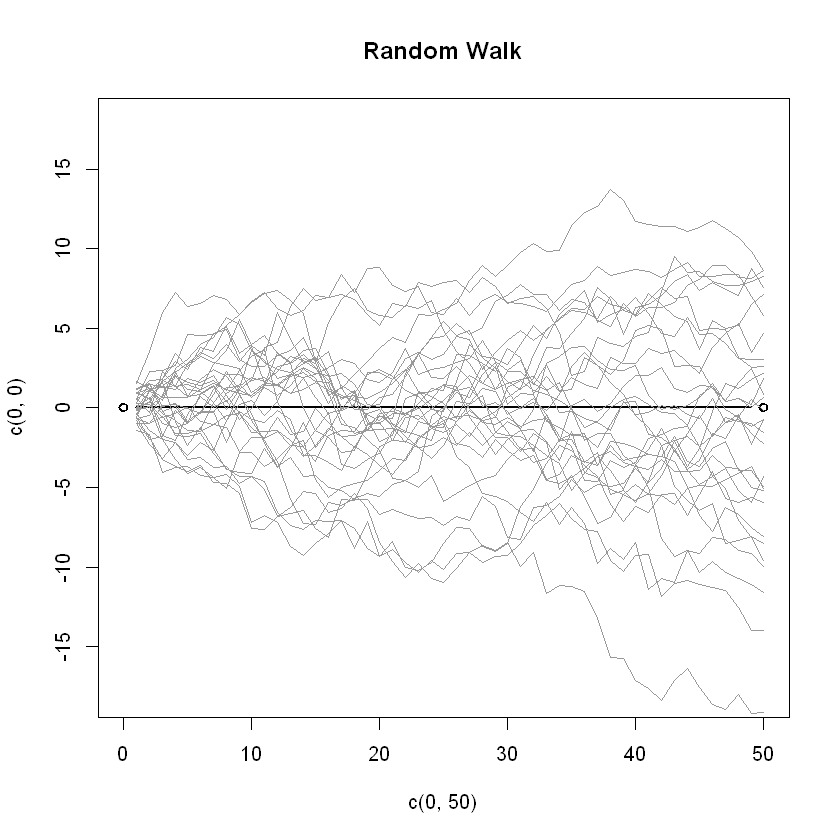

In [2]:
# Tao truc toa do x= (0,50), y=(-18,18), gốc (0,0)
plot(c(0,50),c(0,0),type="b", lwd=2,ylim=c(-18,18), main= "Random Walk")
#lopp over draw
for (r in 1:30){
  # i.i.d stadard normal shock
  e=rnorm(50)
  # Random Walk as cummulative sum shocks
  y=ts(cumsum(e))
  # Add line to graph
  lines(y,col=gray(.6))
}


### TAO RA Random Walk with Drift

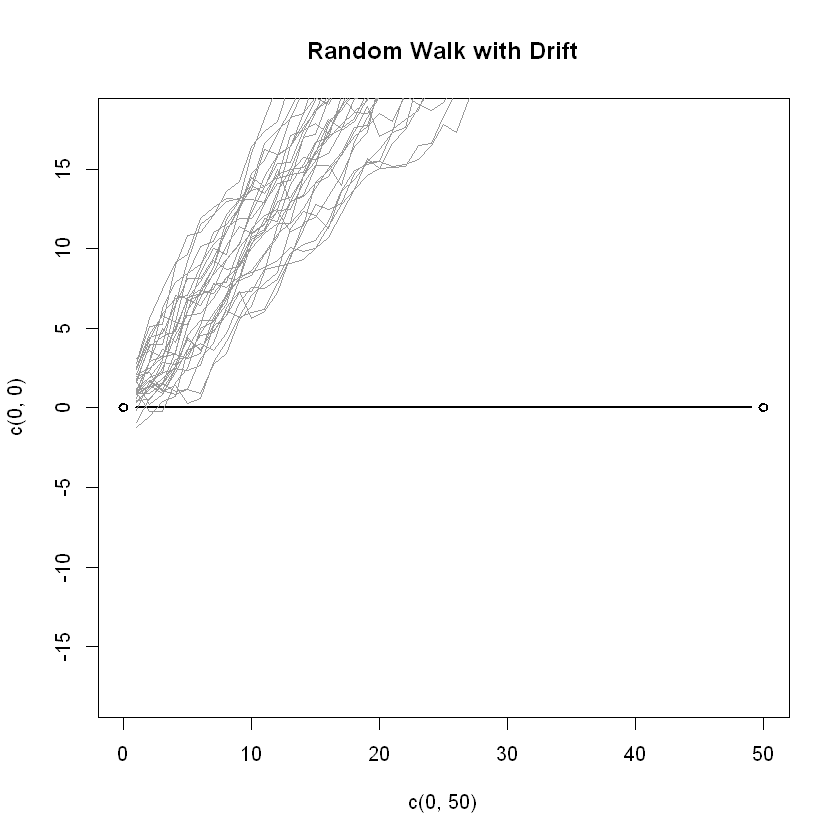

In [4]:
plot(c(0,50),c(0,0),type="b", lwd=2,ylim=c(-18,18), main="Random Walk with Drift")
#lopp over draw
for (r in 1:30){
  # i.i.d stadard normal shock
  e=rnorm(50)
  # Random Walk as cummulative sum shocks
  y=ts(cumsum(1+e))
  # Add line to graph
  lines(y,col=gray(.6))
}


### SAI PHAN CUA Random Walk with Drift

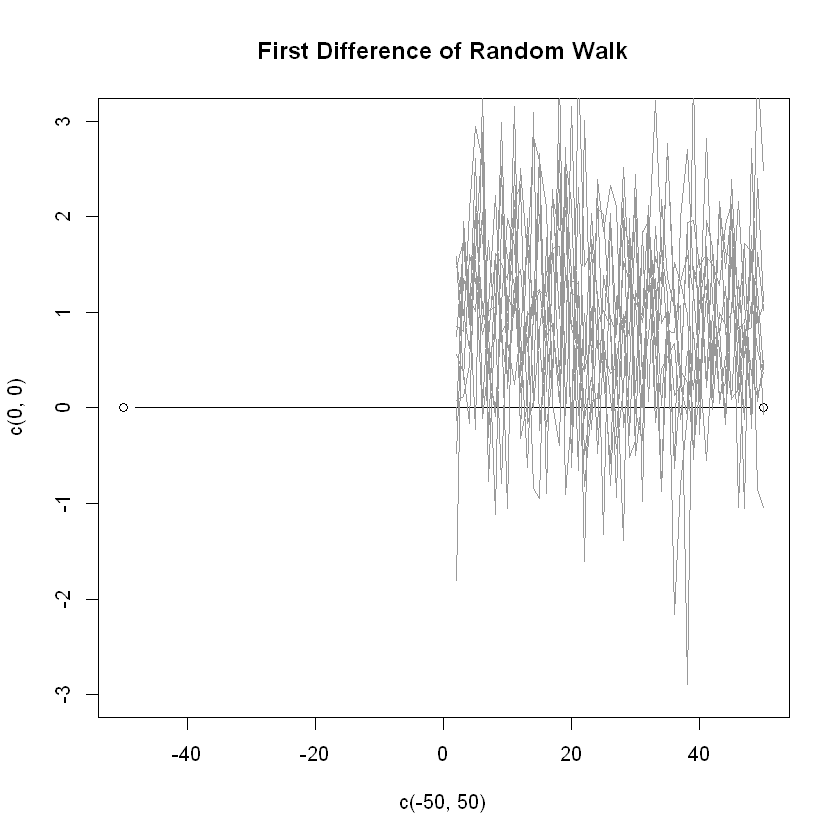

In [5]:
# Tao 1000 phần tử từ phân bố chuẩn hóa
# u=rnorm(1000, 0, 1)
plot(c(-50,50), c(0,0),type="b",ylim=c(-3,3), main="First Difference of Random Walk")
#lopp over draw
for (r in 1:10){
  # i.i.d stadard normal shock
  # Random Walk  with Drift as cummulative sum shocks
  u=rnorm(50, 0, 1)
  y=ts(cumsum(1+u))
  #First Difference
  Dy=diff(y)
  # Add line to graph
  lines(Dy,col=gray(.6))
}


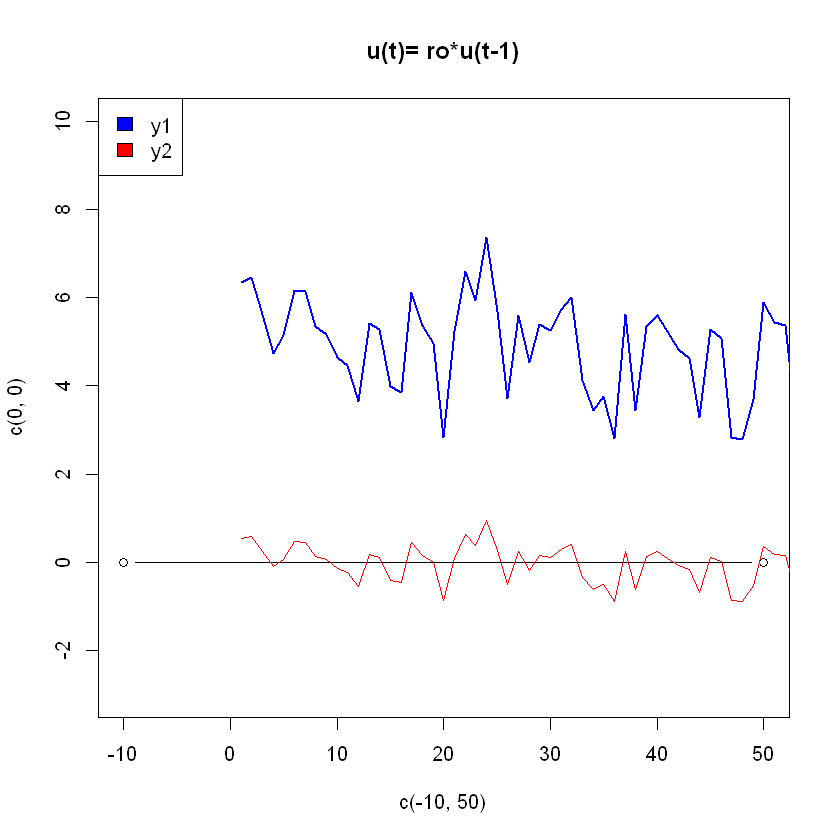

In [6]:
# Tao 1000 phần tử từ phân bố chuẩn hóa
# u=rnorm(1000, 0, 1)
plot(c(-10,50), c(0,0),type="b",ylim=c(-3,10), main="u(t)= ro*u(t-1)")
#lopp over draw
  u=rnorm(500, 0, 1)
  y1=ts(5+u)
  y2=0.4*lag(u,1)
  lines(y1,col="blue",lwd=2)
  lines(y2,col="red",lwd = 1)
  legend("topleft",c("y1","y2"), fill=c("blue","red"))


### ĐỌC SỐ LIỆU VÀ BIẾN SỐ

Warning message:
"package 'readxl' was built under R version 4.2.2"


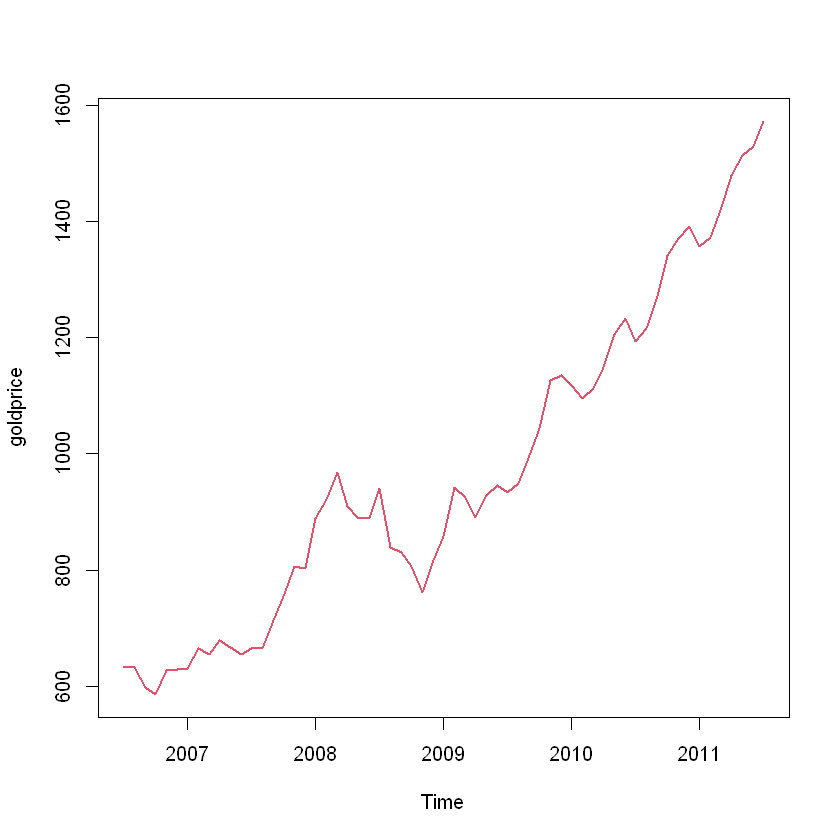

In [7]:
library(readxl)
goldoilprice=read_excel("goldoilprice.xls")

# View(goldoilprice)

# Gán thời gian cho file số liệu. Năm frequency=1; Quý: frequency=4; Tháng: frequency=12

# Chuyển thành chuối thời gian

goldprice=ts(goldoilprice$goldprice, start=c(2006,7), frequency=12)

plot(goldprice,xlab="Time", ylab="goldprice", lwd = 2, col=2) 


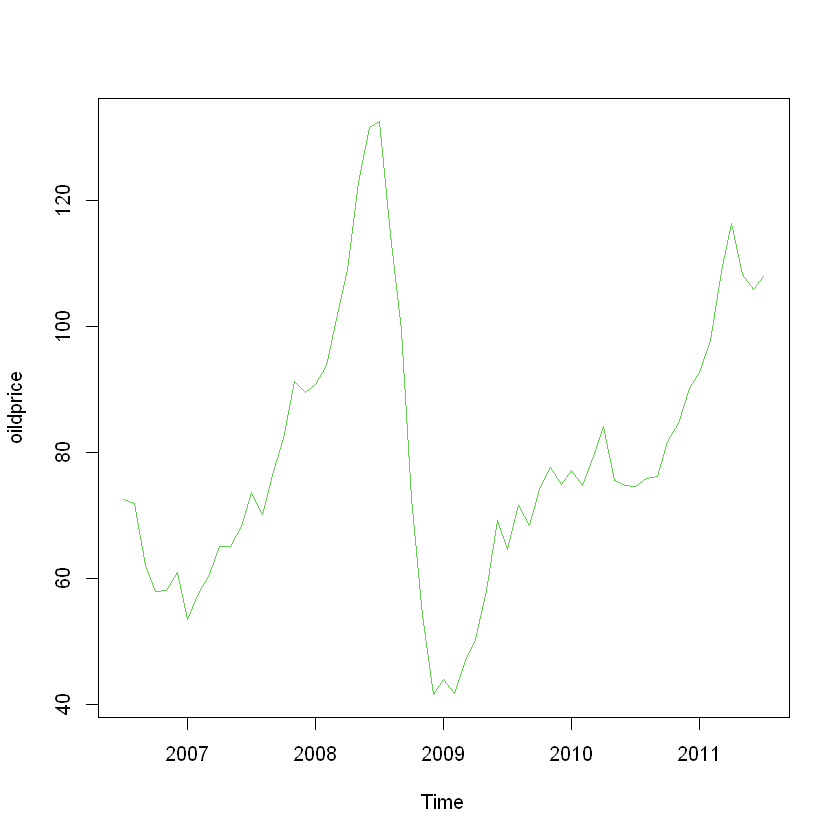

In [8]:
oilprice=ts(goldoilprice$oilprice, start=c(2006,7), frequency=12)

plot(oilprice,xlab="Time", ylab="oildprice", lwd = 1, col=3) 

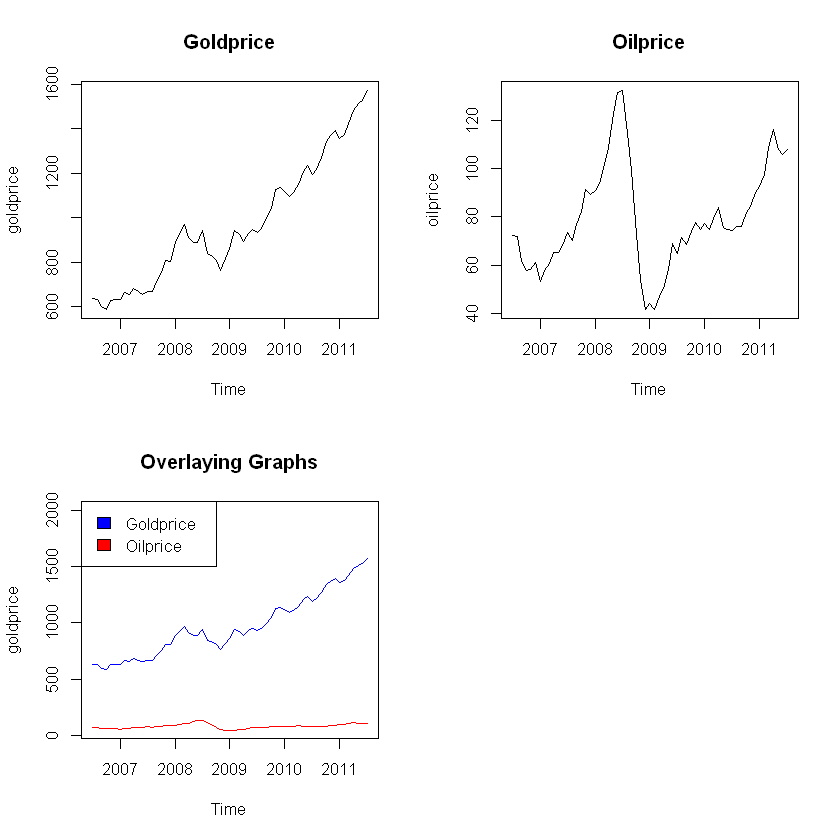

In [9]:
# plot(oilprice, goldprice,xlab="Oilprice", ylab="Goldprice", lwd = 2) 


par(mfrow = c(2,2))
plot(goldprice, main = "Goldprice")
plot(oilprice, main = "Oilprice")

plot(goldprice,
main="Overlaying Graphs",
ylim= c(50,2000),
type="l",
col="blue")
lines(oilprice, col="red")
legend("topleft",
c("Goldprice","Oilprice"),
fill=c("blue","red")
)



par(mfrow = c(1,1))


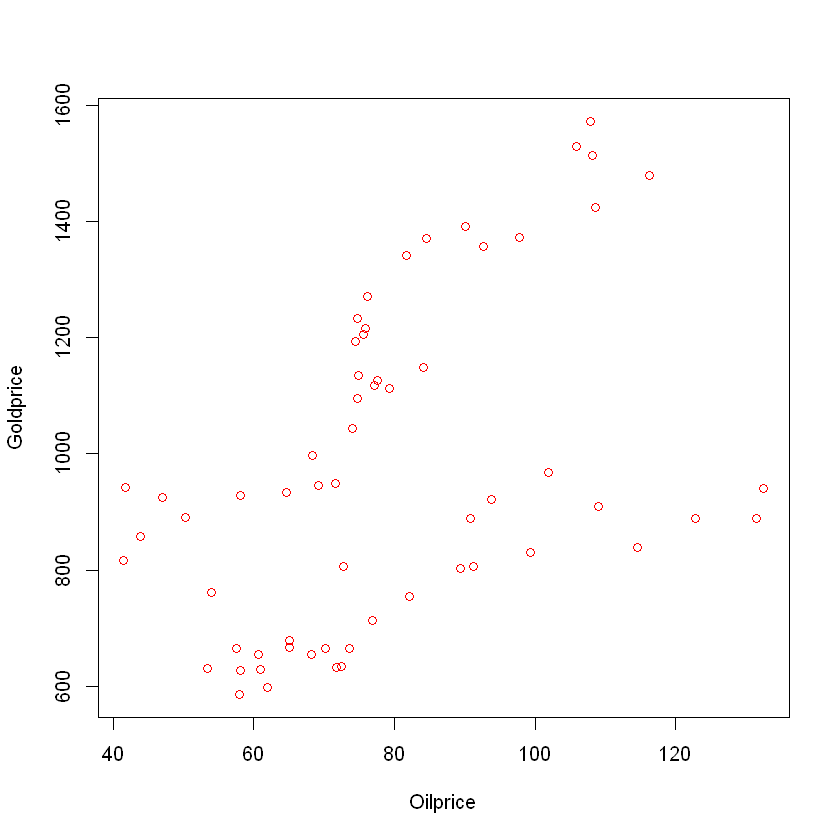

In [10]:
plot(goldoilprice$oilprice,goldoilprice$goldprice, xlab="Oilprice", ylab="Goldprice",col="red" )